In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import math as math
import os
from signalAnalysis import get_LE,get_psd,get_SNR,get_SMR

# make font bigger
import matplotlib
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [10]:
# fs = 1926. # change this to whatever sampling frequency you used
fs = 1000.
fs2 = 1000.

##  Find files

In [11]:
# change path name to wherever you saved your data
# path = 'C:/Users/yamag/Documents/Work/Research/sensorfusion/analysis/EMG signal quality analysis/delsys-data'
# path = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/pilot_1202_emg_raw_coban'
path = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/pilot2_1207_emg/raw'


files = os.listdir(path)    
files = list(filter(lambda f: f.endswith('.csv'), files))

In [12]:
# change path name to wherever you saved your data
# path2 = 'C:/Users/yamag/Documents/Work/Research/sensorfusion/analysis/EMG signal quality analysis/delsys-data'
# path2 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/pilot_1202_emg_raw_noban/pilot_1113_nocoban'
path2 = 'C:/Users/amber/Documents/GitHub/sensorfusion/data/pilot2_1207_emg_ctl2_loop/raw'


files2 = os.listdir(path2)    
files2 = list(filter(lambda f: f.endswith('.csv'), files2))

## Compute average RMS, SNR, SMR for each trial

In [13]:
SNR = []
SMR = []
avg_LE = []

for file in files:
    # import data
    dataraw = pd.read_csv(os.path.join(path,file),
                       names=["Time", "Biceps (V)", "Triceps (V)", "slider"])
    data = dataraw[dataraw["Biceps (V)"].values != 0]
    f,Pxx_bic,Pxx_tri = get_psd(data,fs)
    SNR.append(get_SNR(f,Pxx_bic,Pxx_tri))
    SMR.append(get_SMR(f,Pxx_bic,Pxx_tri))
    avg_LE.append(get_LE(data,fs))


c:\Users\amber\Documents\GitHub\sensorfusion\analysis\EMG signal quality analysis\signalAnalysis.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bic_demean"]= data["Biceps (V)"].values-np.mean(data["Biceps (V)"].values)
c:\Users\amber\Documents\GitHub\sensorfusion\analysis\EMG signal quality analysis\signalAnalysis.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tri_demean"]= data["Triceps (V)"].values-np.mean(data["Triceps (V)"].values)


In [14]:
SNR2 = []
SMR2 = []
avg_LE2 = []

for file in files2:
    # import data
    data = pd.read_csv(os.path.join(path2,file),
                       names=["Time", "Biceps (V)", "Triceps (V)", "slider"])
    f,Pxx_bic,Pxx_tri = get_psd(data,fs2)
    SNR2.append(get_SNR(f,Pxx_bic,Pxx_tri))
    SMR2.append(get_SMR(f,Pxx_bic,Pxx_tri))
    avg_LE2.append(get_LE(data,fs2))

In [15]:
SNR = np.asarray(SNR)
SMR = np.asarray(SMR)
avg_LE = np.asarray(avg_LE)

SNR2 = np.asarray(SNR2)
SMR2 = np.asarray(SMR2)
avg_LE2 = np.asarray(avg_LE2)

## Make some plots

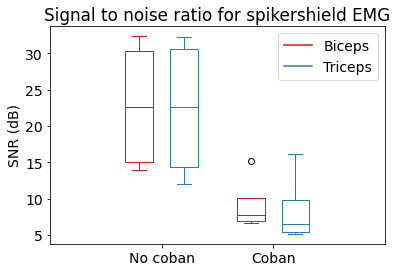

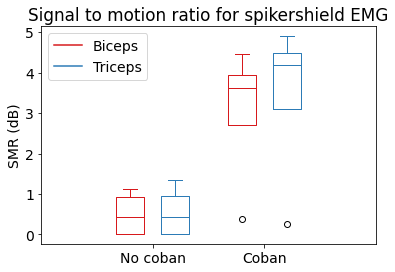

In [16]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
# PLOT SNR
bic = [SNR2[:,0],SNR[:,0]]
tri = [SNR2[:,1],SNR[:,1]]
box2 = plt.boxplot(bic, positions=np.array(range(len(bic)))*2.0-0.4, widths = 0.5)
set_box_color(box2,'#D7191C')
box = plt.boxplot(tri, positions=np.array(range(len(tri)))*2.0+0.4, widths = 0.5)
set_box_color(box,'#2C7BB6')
ticks = ["No coban","Coban"]
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylabel("SNR (dB)")
plt.title("Signal to noise ratio for spikershield EMG")
plt.plot([], c='#D7191C', label='Biceps')
plt.plot([], c='#2C7BB6', label='Triceps')
plt.legend()
plt.show()

# PLOT SMR
bic = [SMR2[:,0],SMR[:,0]]
tri = [SMR2[:,1],SMR[:,1]]
box2 = plt.boxplot(bic, positions=np.array(range(len(bic)))*2.0-0.4, widths = 0.5)
set_box_color(box2,'#D7191C')
box = plt.boxplot(tri, positions=np.array(range(len(tri)))*2.0+0.4, widths = 0.5)
set_box_color(box,'#2C7BB6')
ticks = ["No coban","Coban"]
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylabel("SMR (dB)")
plt.title("Signal to motion ratio for spikershield EMG")
plt.plot([], c='#D7191C', label='Biceps')
plt.plot([], c='#2C7BB6', label='Triceps')
plt.legend()
plt.show()

# PLOT AVG_RMS
# bic = [avg_LE2[:,0]*1000,avg_LE[:,0]*1000*5/1024.]
# tri = [avg_LE2[:,1]*1000,avg_LE[:,1]*1000*5/1024.]
# box2 = plt.boxplot(bic, positions=np.array(range(len(bic)))*2.0-0.4, widths = 0.5)
# set_box_color(box2,'#D7191C')
# box = plt.boxplot(tri, positions=np.array(range(len(tri)))*2.0+0.4, widths = 0.5)
# set_box_color(box,'#2C7BB6')
# ticks = ["Delsys","Spikershields"]
# plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# plt.xlim(-2, len(ticks)*2)
# plt.ylabel("average Linear Envelope (mV)")
# plt.title("EMG Linear Envelope for Delsys and spikershield EMG")
# plt.plot([], c='#D7191C', label='Biceps')
# plt.plot([], c='#2C7BB6', label='Triceps')
# plt.legend()
# plt.show()

